In [70]:
%matplotlib inline
from textblob import TextBlob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import seaborn as sns

In [63]:
df_redditnews = pd.read_csv('RedditNews.csv')
df_redditnews

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...
5,2016-07-01,Brazil: Huge spike in number of police killing...
6,2016-07-01,Austria's highest court annuls presidential el...
7,2016-07-01,"Facebook wins privacy case, can track any Belg..."
8,2016-07-01,Switzerland denies Muslim girls citizenship af...
9,2016-07-01,China kills millions of innocent meditators fo...


In [55]:
def weekNum(t):
    if t.month == 12 and t.week == 1:
        return t.week + ((t.year+1)*100)
    elif t.month == 1 and t.week == 53:
        return 1+ t.year*100
    else:
        return t.week + (t.year*100)

In [60]:
df_weeklyredditnews = (df_redditnews.groupby(df_redditnews['Date']).sum())
df_weeklyredditnews['WeekNum'] = pd.to_datetime(df_weeklyredditnews.index)
df_weeklyredditnews.index = df_weeklyredditnews['WeekNum'].apply(weekNum)
df_weeklyredditnews = df_weeklyredditnews.groupby(df_weeklyredditnews.index).sum()


In [61]:
df_weeklyredditnews['Sentiment'] = list(map(lambda x: TextBlob(x).sentiment,df_weeklyredditnews['News']))
df_weeklyredditnews['Sentiment'] = list(map(lambda x: x[0],df_weeklyredditnews['Sentiment']))

In [62]:
df_weeklyredditnews

,News,Sentiment
WeekNum,,
200823,b'Nim Chimpsky: The tragedy of the chimp who t...,-0.050594
200824,"b'United States quits Human Rights Council'b""P...",0.036712
200825,b' Iran withdraws $75 billion from Europe'b'Li...,0.018525
200826,b'The Real State of Iraq: American television ...,-0.000921
200827,b'President Bush and Vice President Dick Chene...,0.003027
200828,b'It is obvious they will come door to door. I...,0.026438
200829,b'Dozens of partygoers at an outdoor rave near...,0.049855
200830,b'Experts Confirm that Iran\'s President did N...,0.012122
200831,b'New Swedish telecommunications law is turnin...,0.013449


In [79]:
df_dow = pd.read_csv('DJI.csv')

In [80]:
def weeklyData(df):
    data = pd.DataFrame()
    
    df['Timestamp'] = pd.to_datetime(df['Date']).apply(weekNum)
    df['WeeklyAvg'] = df['Close']
    df['WeeklyChangeAvg'] = df['Close'].diff()
    data['WeeklyChangeTotal'] = df[1:].groupby(df.Timestamp).sum()['WeeklyChangeAvg']
    data[['WeeklyAvg', 'WeeklyChangeAvg']] = df.groupby(df.Timestamp).mean()[['WeeklyAvg','WeeklyChangeAvg']]
    
    return data

In [81]:
df_dow = weeklyData(df_dow)

In [82]:
df_dow

,WeeklyChangeTotal,WeeklyAvg,WeeklyChangeAvg
Timestamp,,,
200823,-394.640625,12407.129882,-394.640625
200824,97.540039,12220.555859,19.508008
200825,-464.659179,12072.843945,-92.931836
200826,-496.180664,11652.309961,-99.236133
200827,-57.969727,11309.079834,-14.492432
200828,-188.000000,11218.633984,-37.600000
200829,396.030274,11240.048242,79.206055
200830,-125.879883,11484.438086,-25.175977
200831,-44.370117,11363.333984,-8.874023


In [83]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

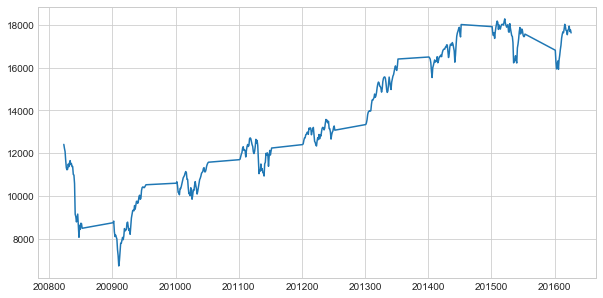

In [84]:
plt.plot(df_dow.index,df_dow['WeeklyAvg'])

In [86]:
dow_reddit = df_weeklyredditnews.join(df_dow,how='outer')
#nike_all.sort_values(by='Date')

In [103]:
def stock_change_to_binary(series):
    
    binary_list = []
    for i in series:
        if(i>=0):
            binary_list.append(1)
        else:
            binary_list.append(0)
    return binary_list

In [104]:
dow_reddit['Binary Change'] = stock_change_to_binary(dow_reddit['WeeklyChangeTotal'])

In [105]:
dow_reddit

,News,Sentiment,WeeklyChangeTotal,WeeklyAvg,WeeklyChangeAvg,Binary Change
WeekNum,,,,,,
200823,b'Nim Chimpsky: The tragedy of the chimp who t...,-0.050594,-394.640625,12407.129882,-394.640625,0
200824,"b'United States quits Human Rights Council'b""P...",0.036712,97.540039,12220.555859,19.508008,1
200825,b' Iran withdraws $75 billion from Europe'b'Li...,0.018525,-464.659179,12072.843945,-92.931836,0
200826,b'The Real State of Iraq: American television ...,-0.000921,-496.180664,11652.309961,-99.236133,0
200827,b'President Bush and Vice President Dick Chene...,0.003027,-57.969727,11309.079834,-14.492432,0
200828,b'It is obvious they will come door to door. I...,0.026438,-188.000000,11218.633984,-37.600000,0
200829,b'Dozens of partygoers at an outdoor rave near...,0.049855,396.030274,11240.048242,79.206055,1
200830,b'Experts Confirm that Iran\'s President did N...,0.012122,-125.879883,11484.438086,-25.175977,0
200831,b'New Swedish telecommunications law is turnin...,0.013449,-44.370117,11363.333984,-8.874023,0


In [106]:
dow_reddit.corr()

,Sentiment,WeeklyChangeTotal,WeeklyAvg,WeeklyChangeAvg,Binary Change
Sentiment,1.000000,0.000560,0.222503,0.037324,-0.011415
WeeklyChangeTotal,0.000560,1.000000,0.033800,0.967712,0.744280
WeeklyAvg,0.222503,0.033800,1.000000,0.036604,0.048329
WeeklyChangeAvg,0.037324,0.967712,0.036604,1.000000,0.724775
Binary Change,-0.011415,0.744280,0.048329,0.724775,1.000000
